## 3.6 Lab - Linear Regression

### 3.6.1 Libraries

The *library()* function is used to load libraries, or groups of functions and data sets that are not included in the base R distribution. Basic functions that perform least squares linear regression and other simple analyses come standard with the base distribution, but more exotic functions require additional libraries. Here we load the *MASS* package, which is a very large
collection of data sets and functions. We also load the *ISLR* package, which includes the data sets associated with this book.

In [1]:
library(MASS)
# library(ISLR)

If you receive an error message when loading any of these libraries, it likely indicates that the corresponding library has not yet been installed on your system. Some libraries, such as *MASS*, come with *R* and do not need to be separately installed on your computer. However, other packages, such as *ISLR*, must be downloaded the ﬁrst time they are used. This can be done directly from within *R*. For example, on a Windows system, select the *Install package* option under the *Packages* tab. After you select any mirror site, a list of available packages will appear. Simply select the package you wish to
install and *R* will automatically download the package. Alternatively, this can be done at the R command line via *install.packages("ISLR")*. This installation only needs to be done the ﬁrst time you use a package. However, the *library()* function must be called each time you wish to use a given package.

### 3.6.2 Simple Linear Regression

The *MASS* library contains the *Boston* data set, which records *medv* (median house value) for 506 neighborhoods around Boston. We will seek to predict medv using 13 predictors such as *rm* (average number of rooms per house), *age* (average age of houses), and *lstat* (percent of households with low socioeconomic status).

In [2]:
# fix(Boston)
data(Boston)
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

To ﬁnd out more about the data set, we can type *?Boston*.

In [4]:
?Boston

We will start by using the *lm()* function to ﬁt a simple linear regression model, with *medv* as the response and *lstat* as the predictor. The basic syntax is *lm(y ∼ x,data)*, where *y* is the response, *x* is the predictor, and *data* is the data set in which these two variables are kept.

In [5]:
lm.fit = lm(medv ∼ lstat)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:18: unexpected input
1: lm.fit = lm(medv <e2>
                     ^


The command causes an error because *R* does not know where to ﬁnd the variables *medv* and *lstat*. The next line tells *R* that the variables are in *Boston*. If we attach *Boston*, the ﬁrst line works ﬁne because *R* now recognizes the variables.

In [6]:
lm.fit = lm(medv ~ lstat, data = Boston)

In [7]:
attach(Boston)
lm.fit = lm(medv ~ lstat)

If we type *lm.fit*, some basic information about the model is output. For more detailed information, we use 
*summary(lm.fit)*. This gives us p-values and standard errors for the coeﬃcients, as well as the $R^2$ statistic and F-statistic for the model.

In [8]:
lm.fit


Call:
lm(formula = medv ~ lstat)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [9]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


We can use the *names()* function in order to ﬁnd out what other pieces of information are stored in *lm.fit*. Although we can extract these quantities by name—e.g. *lm.fit$coefficients*—it is safer to use the extractor functions like *coef()* to access them.

In [10]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [11]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

In order to obtain a conﬁdence interval for the coeﬃcient estimates, we can use the *confint()* command.

In [12]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The *predict()* function can be used to produce conﬁdence intervals and prediction intervals for the prediction of *medv* for a given value of *lstat*.

In [13]:
predict(lm.fit , data.frame (lstat = c(5, 10, 15)), interval = "confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [14]:
predict(lm.fit , data.frame (lstat = c(5, 10, 15)), interval = "prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


For instance, the 95 % conﬁdence interval associated with a *lstat* value of 10 is (24.47, 25.63), and the 95 % prediction interval is (12.828, 37.28). As expected, the conﬁdence and prediction intervals are centered around the same point (a predicted value of 25.05 for *medv* when *lstat* equals 10), but the latter are substantially wider.  
We will now plot *medv* and *lstat* along with the least squares regression line using the *plot()* and *abline()* functions.

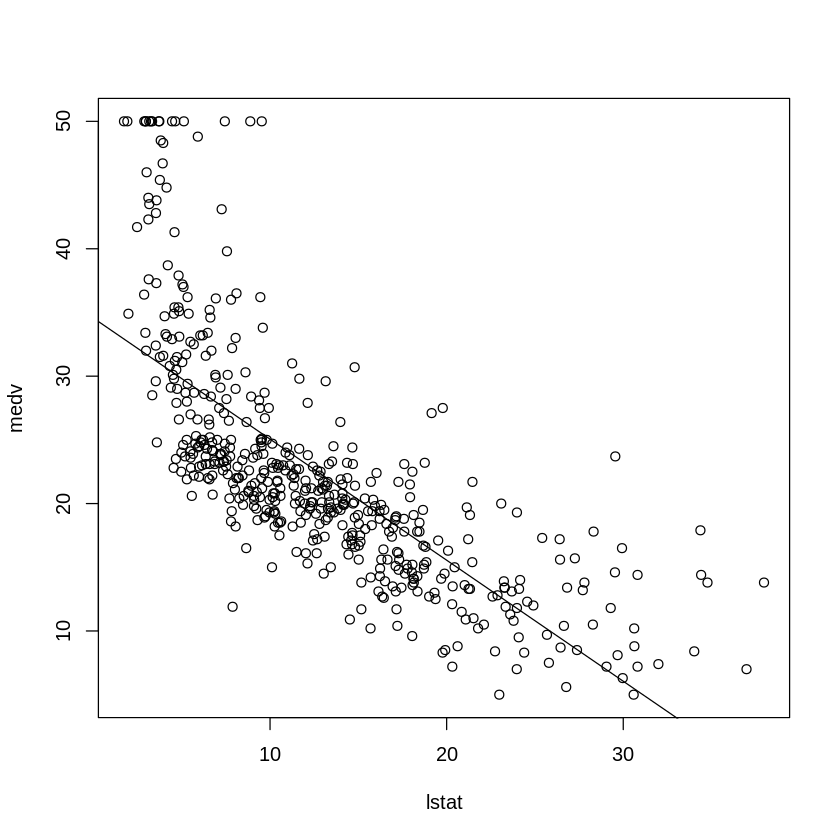

In [15]:
plot(lstat, medv)
abline(lm.fit)

There is some evidence for non-linearity in the relationship between *lstat* and *medv*. We will explore this issue later in this lab.  
The *abline()* function can be used to draw any line, not just the least squares regression line. To draw a line with intercept *a* and slope *b*, we type *abline(a,b)*. Below we experiment with some additional settings for plotting lines and points. The *lwd=3* command causes the width of the regression line to be increased by a factor of 3; this works for the *plot()* and *lines()* functions also. We can also use the pch option to create diﬀerent plotting symbols.

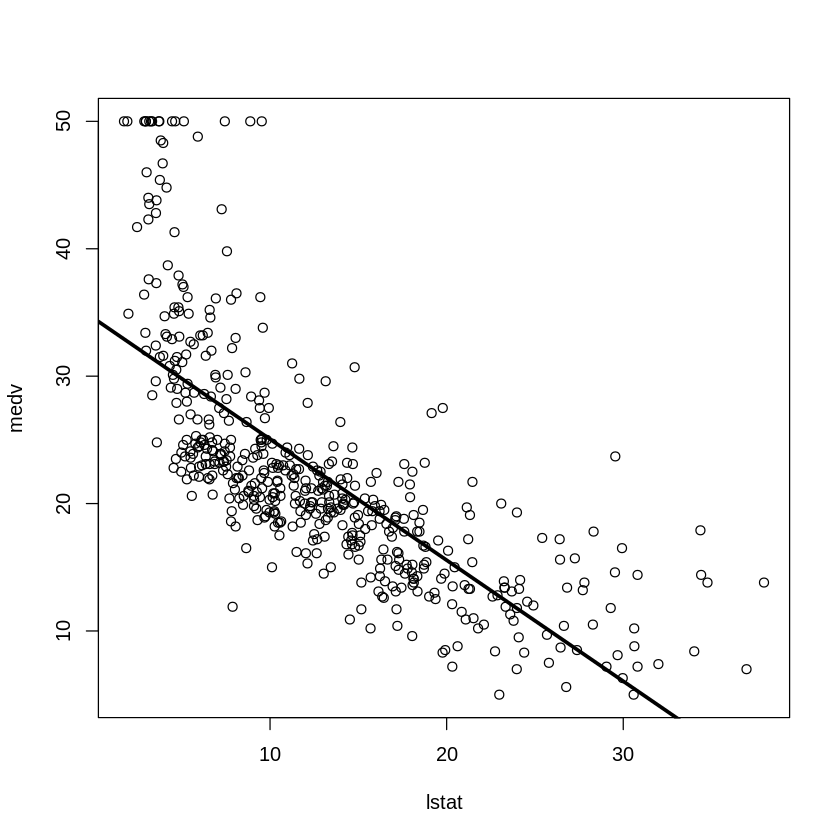

In [16]:
plot(lstat, medv)
abline(lm.fit, lwd = 3)

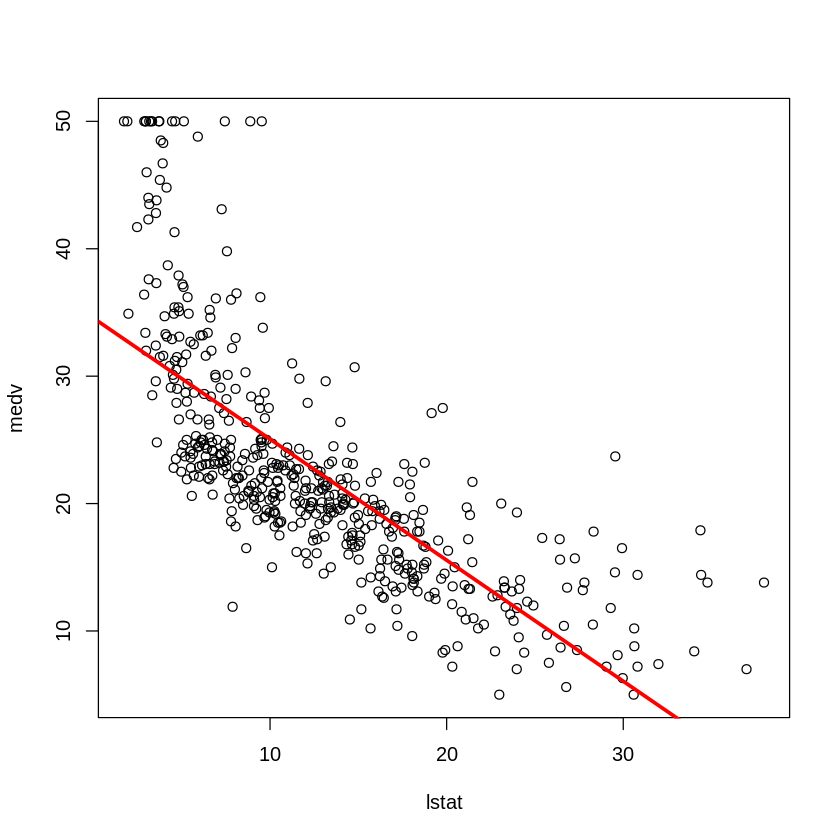

In [17]:
plot(lstat, medv)
abline(lm.fit, lwd = 3, col = "red")

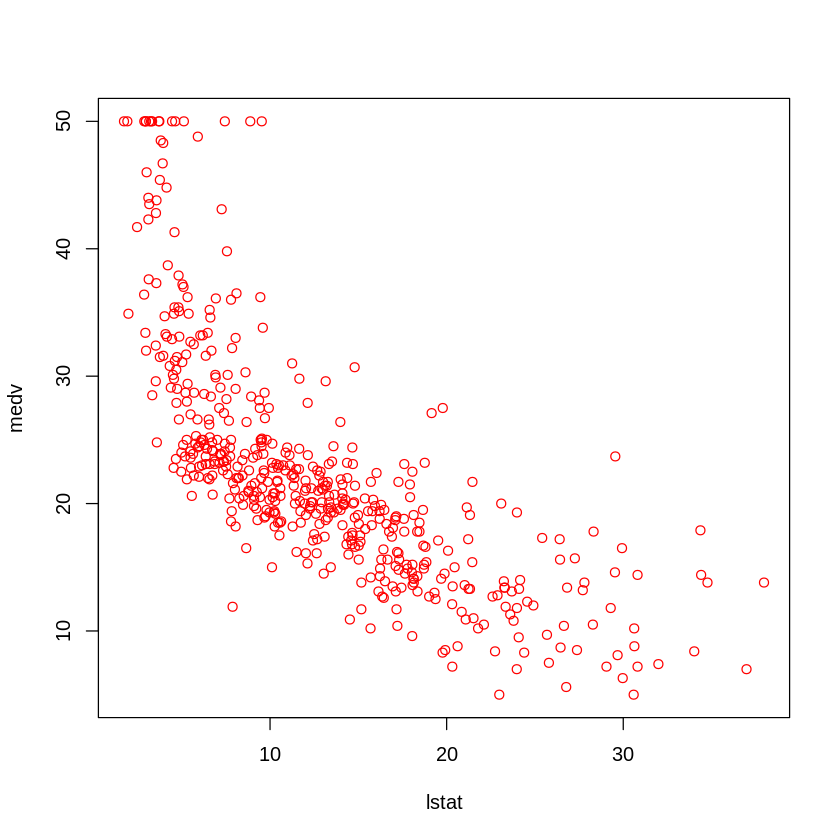

In [18]:
plot(lstat, medv, col ="red")

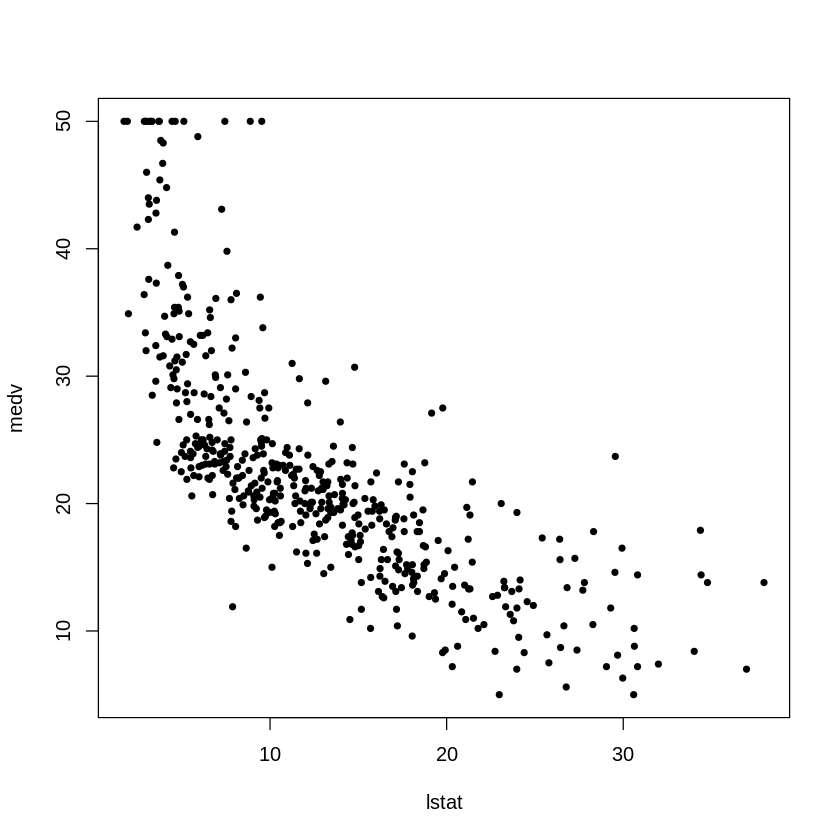

In [19]:
plot(lstat, medv, pch = 20)

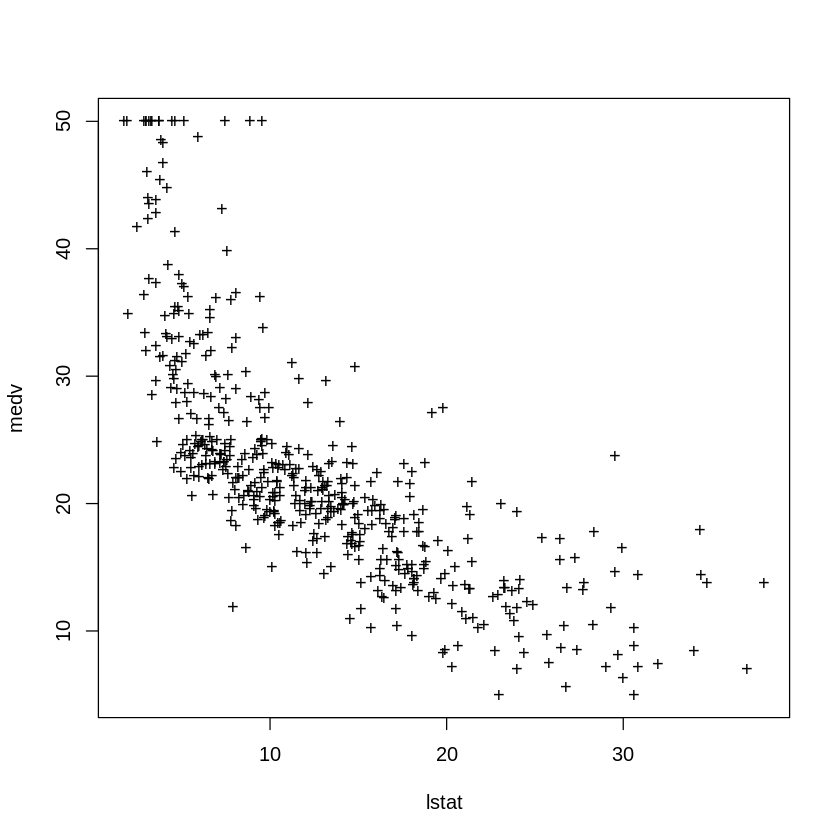

In [20]:
plot(lstat, medv, pch = "+")

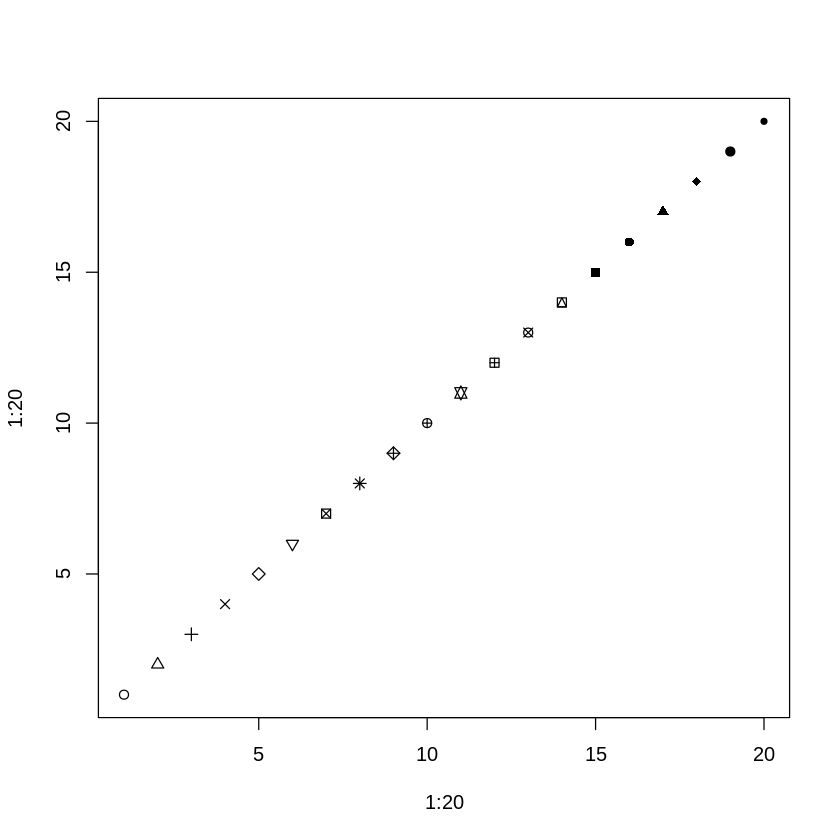

In [21]:
plot(1:20, 1:20, pch = 1:20)

Next we examine some diagnostic plots, several of which were discussed in Section 3.3.3. Four diagnostic plots are automatically produced by applying the *plot()( function directly to the output from *lm()*. In general, this command will produce one plot at a time, and hitting *Enter* will generate the next plot. However, it is often convenient to view all four plots together. We can achieve this by using the *par()* function, which tells *R* to split the display screen into separate panels so that multiple plots can be viewed simultaneously. For example, *par(mfrow=c(2,2))* divides the plotting region into a 2 × 2 grid of panels.

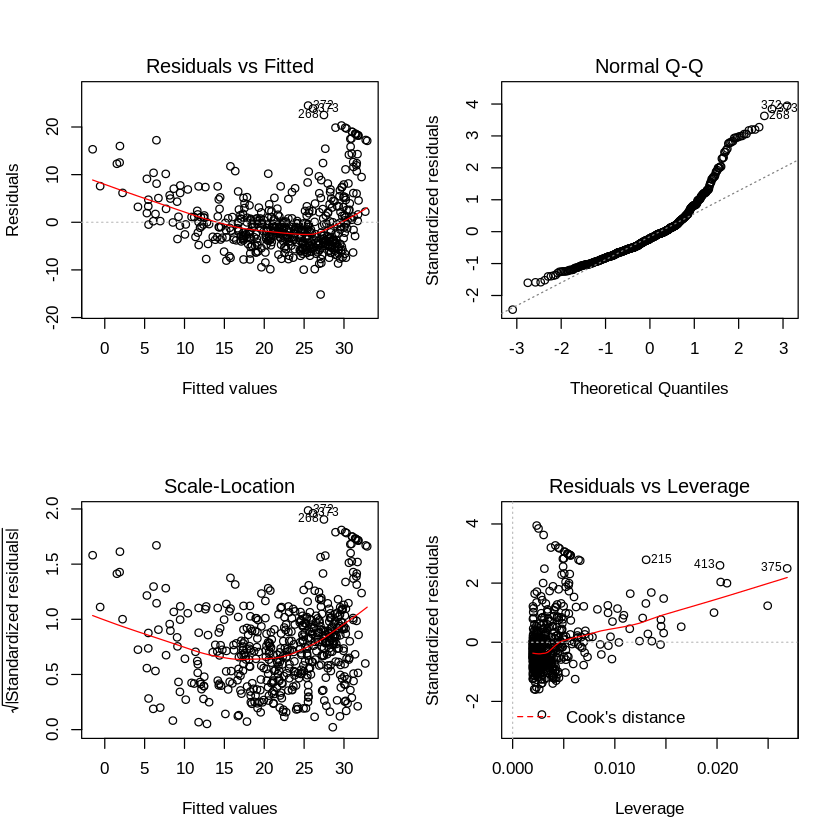

In [22]:
par(mfrow = c(2, 2))
plot(lm.fit)

Alternatively, we can compute the residuals from a linear regression ﬁt using the *residuals()* function. The function *rstudent()* will return the residuals() studentized residuals, and we can use this function to plot the residuals against the ﬁtted values.

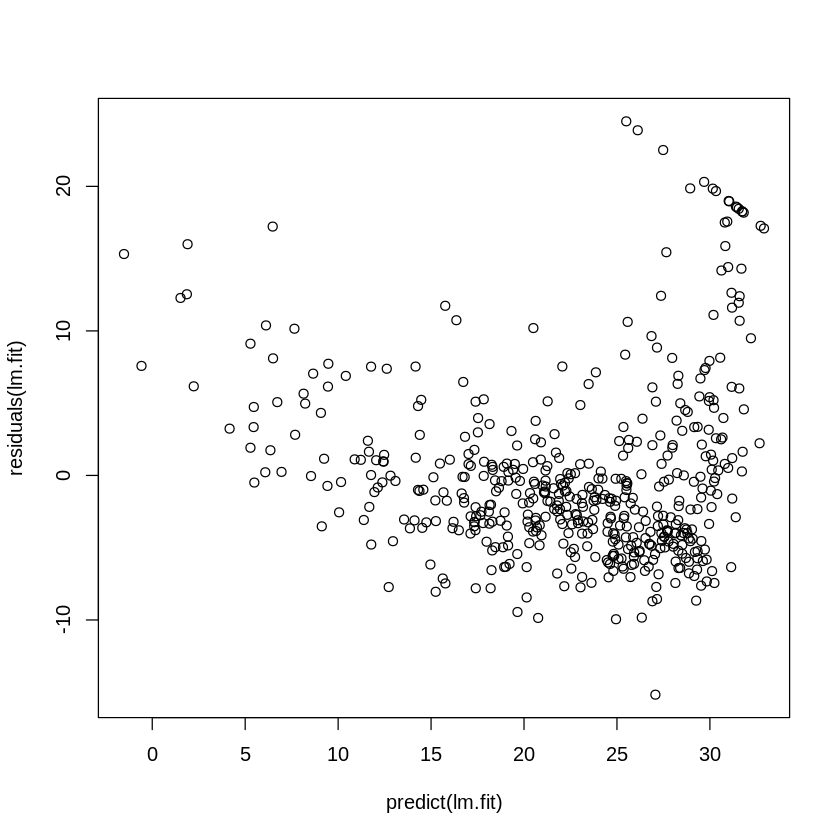

In [23]:
plot(predict(lm.fit), residuals(lm.fit))

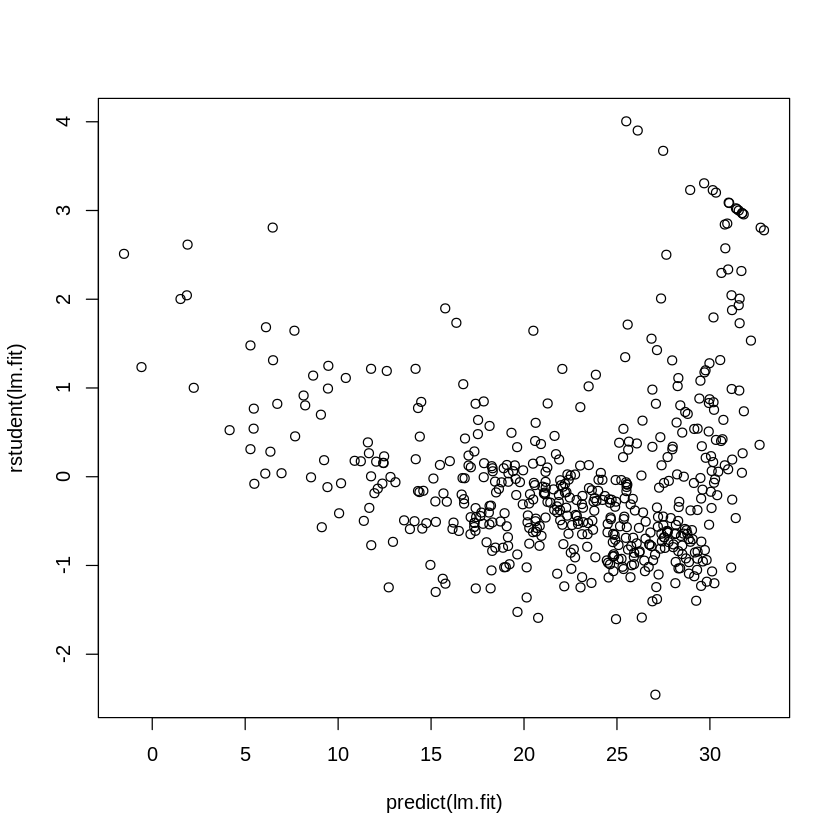

In [24]:
plot(predict(lm.fit), rstudent(lm.fit))

On the basis of the residual plots, there is some evidence of non-linearity. Leverage statistics can be computed for any number of predictors using the *hatvalues()* function.

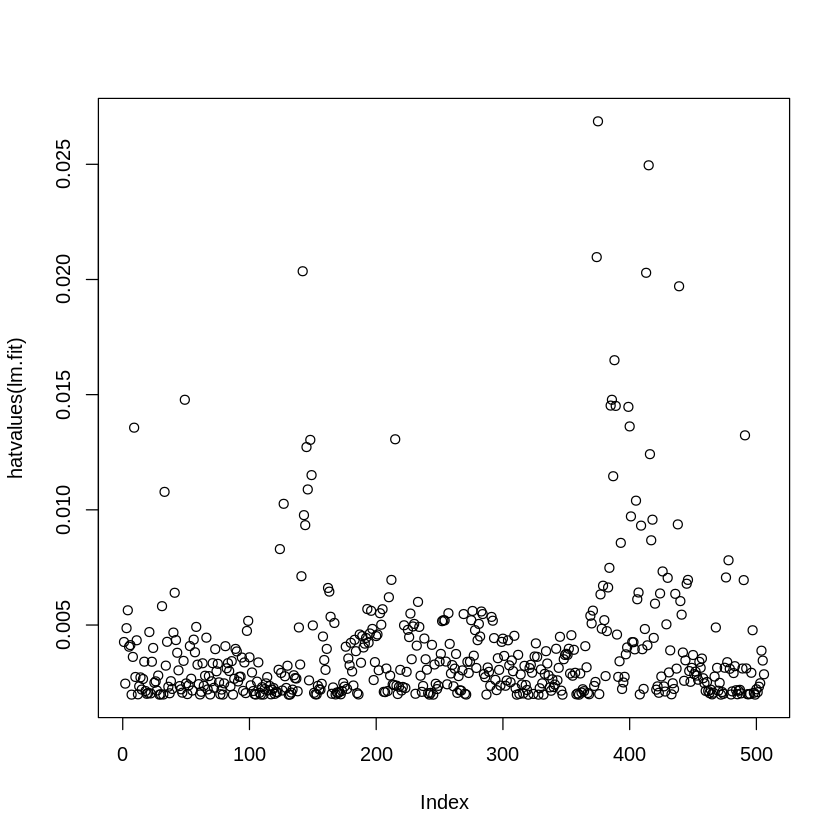

In [25]:
plot(hatvalues(lm.fit))

In [26]:
which.max(hatvalues(lm.fit))

375 
375

The *which.max()* function identiﬁes the index of the largest element of a vector. In this case, it tells us which observation has the largest leverage statistic.

### 3.6.3 Multiple Linear Regression

In order to ﬁt a multiple linear regression model using least squares, we again use the *lm()* function. The syntax *lm(y∼x1+x2+x3)* is used to ﬁt a model with three predictors, *x1*, *x2*, and *x3*. The *summary()* function now outputs the regression coeﬃcients for all the predictors.

In [27]:
lm.fit = lm(medv ~ lstat + age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


The *Boston* data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [31]:
lm.fit = lm(medv ~ ., data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

We can access the individual components of a summary object by name (type *?summary.lm* to see what is available). Hence *summary(lm.fit)\$r.sq* gives us the $R^2$, and *summary(lm.fit)$sigma* gives us the RSE. The *vif()* function, part of the *car* package, can be used to compute variance inﬂation factors. Most VIF’s are low to moderate for this data. The *car* package is not part of the base *R* installation so it must be downloaded the ﬁrst time
you use it via the *install.packages* option in *R*.

In [32]:
library(car)

In [33]:
vif(lm.fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, *age* has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except *age*.

In [35]:
lm.fit1 = lm(medv ~ . - age ,data = Boston)
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

Alternatively, the *update()* function can be used.

In [37]:
lm.fit1 = update(lm.fit, ~ . - age)

### 3.6.4 Interaction Terms

It is easy to include interaction terms in a linear model using the *lm()* function. The syntax *lstat:black* tells *R* to include an interaction term between *lstat* and *black*. The syntax *lstat*age* simultaneously includes *lstat*, *age*, and the interaction term *lstat$\times$age* as predictors; it is a shorthand for *lstat+age+lstat:age*.

In [38]:
summary(lm(medv ~ lstat*age, data = Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


### 3.6.5 Non-linear Transformations of the Predictors

The *lm()* function can also accommodate non-linear transformations of the predictors. For instance, given a predictor *X*, we can create a predictor *$X^2$* using *I(X^2)*. The function *I()* is needed since the *^* has a special meaning in a formula; wrapping as we do allows the standard usage in *R*, which is to raise *X* to the power *2*. We now perform a regression of *medv* onto *lstat* and *$lstat^2$*.

In [39]:
lm.fit2 = lm(medv ~ lstat + I(lstat^2))

In [40]:
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the *anova()* function to further quantify the extent to which the quadratic ﬁt is superior to the linear ﬁt.

In [41]:
lm.fit = lm(medv ~ lstat)
anova(lm.fit, lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor, *lstat*, while Model 2 corresponds to the larger quadratic model that has two predictors, *lstat* and *$lstat^2$*. The *anova()* function performs a hypothesis test comparing the two models. The null hypothesis is that the two models ﬁt the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors *lstat* and *$lstat^2$* is far superior to the model that only contains the predictor *lstat*. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between *medv* and *lstat*. If we type

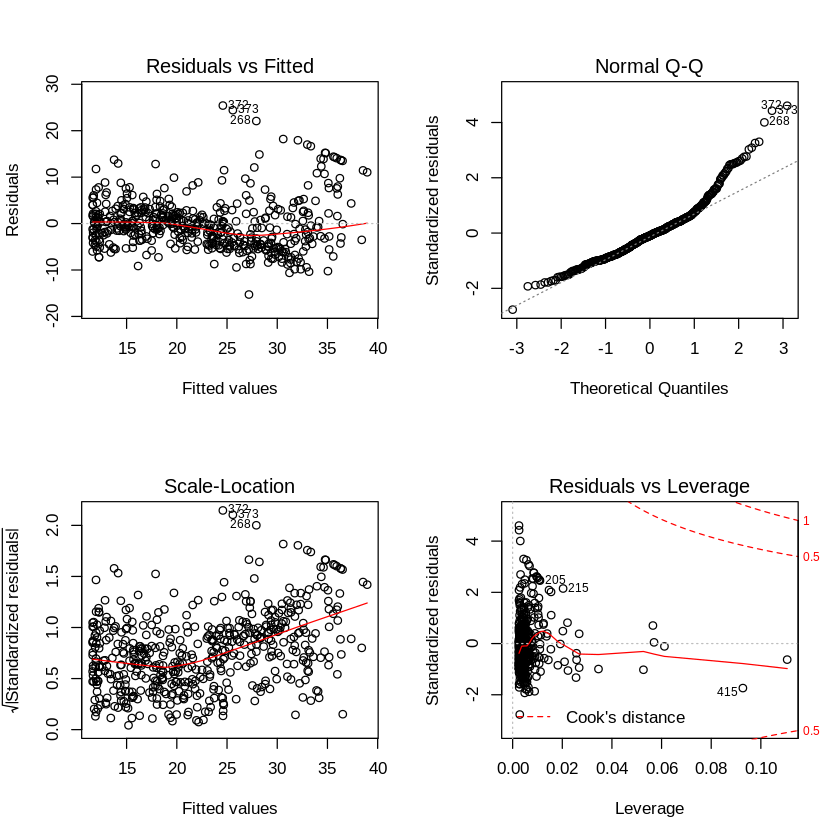

In [42]:
par(mfrow = c(2, 2))
plot(lm.fit2)

then we see that when the *$lstat^2$* term is included in the model, there is little discernible pattern in the residuals.  
In order to create a cubic ﬁt, we can include a predictor of the form *I(X^3)*. However, this approach can start to get cumbersome for higher-order polynomials. A better approach involves using the *poly()* function to create the polynomial within lm(). For example, the following command produces a ﬁfth-order polynomial ﬁt:

In [43]:
lm.fit5 = lm(medv ~ poly(lstat, 5))
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


This suggests that including additional polynomial terms, up to ﬁfth order, leads to an improvement in the model ﬁt! However, further investigation of the data reveals that no polynomial terms beyond ﬁfth order have signiﬁcant p-values in a regression ﬁt.  
Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [44]:
summary(lm(medv ~ log(rm), data = Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


### 3.6.6 Qualitative Predictors

We will now examine the *Carseats* data, which is part of the *ISLR* library. We will attempt to predict *Sales* (child car seat sales) in 400 locations based on a number of predictors.

In [55]:
# data(Carseats)
Carseats = read.csv("../../../data/Carseats.csv")

In [56]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [57]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

The *Carseats* data includes qualitative predictors such as *Shelveloc*, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor *Shelveloc* takes on three possible values, *Bad*, *Medium*, and *Good*. Given a qualitative variable such as *Shelveloc*, *R* generates dummy variables automatically. Below we ﬁt a multiple regression model that includes some interaction terms.

In [58]:
lm.fit = lm(Sales ~ . + Income:Advertising + Price:Age, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

The *contrasts()* function returns the coding that *R* uses for the dummy variables.

In [59]:
attach(Carseats)
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


Use *?contrasts* to learn about other contrasts, and how to set them.  
*R* has created a *ShelveLocGood* dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a *ShelveLocMedium* dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables. The fact that the coefficient for *ShelveLocGood* in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And *ShelveLocMedium* has a smaller positive coeﬃcient, indicating that a medium shelving location leads to higher sales than a bad shelving location but lower sales than a good shelving location.

### 3.6.7 Writing Functions

As we have seen, *R* comes with many useful functions, and still more functions are available by way of *R* libraries. However, we will often be interested in performing an operation for which no function is available. In this setting, we may want to write our own function. For instance, below we provide a simple function that reads in the ISLR and MASS libraries, called *LoadLibraries()*. Before we have created the function, *R* returns an error if we try to call it.

In [60]:
LoadLibraries

ERROR: Error in eval(expr, envir, enclos): object 'LoadLibraries' not found


In [61]:
LoadLibraries()

ERROR: Error in LoadLibraries(): could not find function "LoadLibraries"


We now create the function. Note that the *+* symbols are printed by *R* and should not be typed in. The *{* symbol informs *R* that multiple commands are about to be input. Hitting Enter after typing *{* will cause *R* to print the *+* symbol. We can then input as many commands as we wish, hitting *Enter* after each one. Finally the *}* symbol informs *R* that no further commands
will be entered.

In [62]:
LoadLibraries= function () {
  # library (ISLR )
  library (MASS )
  print (" The libraries have been loaded .")
}

Now if we type in *LoadLibraries*, *R* will tell us what is in the function.

In [63]:
LoadLibraries

function () {
  # library (ISLR )
  library (MASS )
  print (" The libraries have been loaded .")
}

If we call the function, the libraries are loaded in and the print statement is output.

In [64]:
LoadLibraries()

[1] " The libraries have been loaded ."
